# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [145]:
import warnings 

warnings.filterwarnings("ignore") 

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
haber=pd.read_csv('haberman.csv')

In [148]:
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


 #  <b >INITIAL LOOK </b>

* From the first look of the data and the information from kaggle problem about the categories
  - Age is the patient age during operation
  - Op year is the year of operation
  - nodes is number of positive axillary nodes detected
  - Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
    

In [149]:
haber.shape

(306, 4)

In [150]:
haber.describe()


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [151]:
haber['status'].value_counts()
#out of 306 , 225 survived more than 5 years and 81 died before 5 years

1    225
2     81
Name: status, dtype: int64

# Describe 

Does not give us much information than we already know , except the average age of patients who have undergone surgery is roughly around 53 


In [152]:
haber['age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: age, dtype: int64

In [153]:
survived=haber.loc[haber['status']==1]
notsurvived =haber.loc[haber['status']==2]


In [154]:
survived.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [155]:
notsurvived.head()

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2
43,41,60,23,2


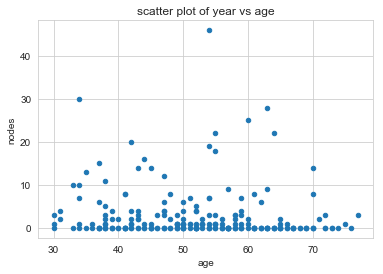

In [156]:
survived.plot(kind='scatter', x='age', y='nodes')
plt.title('scatter plot of year vs age')
plt.show()
#most of the nodes are below 5 
#we do not have 

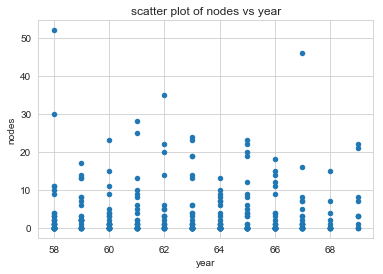

In [157]:
haber.plot(kind='scatter', x='year', y='nodes') ;
plt.title('scatter plot of nodes vs year')
plt.show()

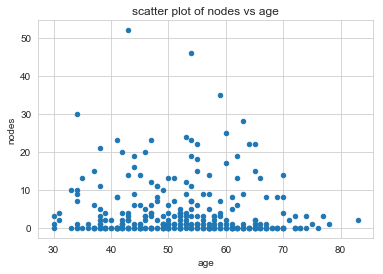

In [158]:
haber.plot(kind='scatter', x='age', y='nodes', ) ;
plt.title('scatter plot of nodes vs age')
plt.show()

In [159]:
haber.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [160]:
haber['status'] = haber['status'].map({1:'survived',2:'died'})

# Pair Plot

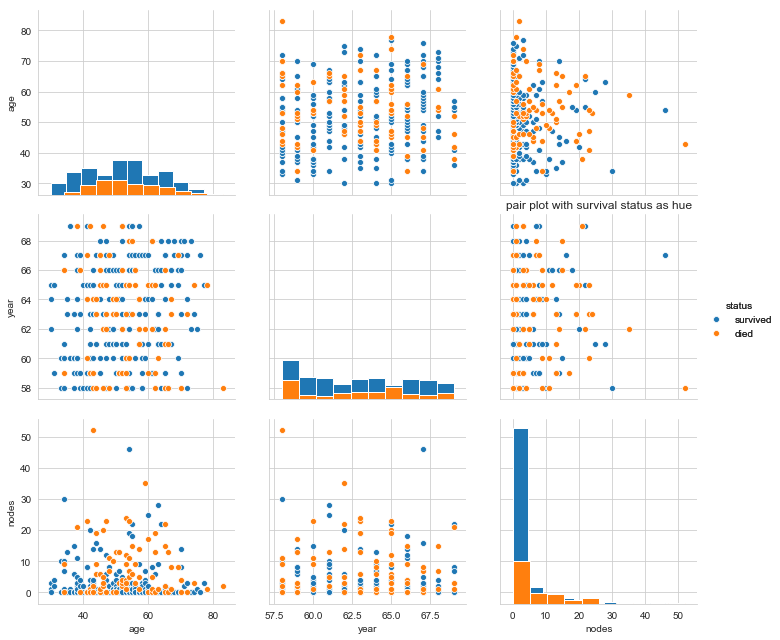

In [161]:
sns.set_style("whitegrid");
sns.pairplot(haber, hue="status", height=3,diag_kind='hist').add_legend()
plt.title('pair plot with survival status as hue')

plt.show()

# Observation:
1) Axillary nodes doesn't depend on patients age

2) it is difficult to classify a patient based on his features

In [162]:
haber['status'].value_counts()

survived    225
died         81
Name: status, dtype: int64

In [163]:
survived['nodes'].value_counts()

0     117
1      33
2      15
3      13
4      10
7       5
8       5
6       4
14      3
10      2
22      2
5       2
9       2
46      1
11      1
30      1
13      1
15      1
16      1
18      1
19      1
20      1
25      1
28      1
12      1
Name: nodes, dtype: int64

In [164]:
notsurvived['nodes'].value_counts()

0     19
1      8
3      7
2      5
9      4
5      4
13     4
23     3
4      3
6      3
11     3
19     2
15     2
7      2
8      2
52     1
10     1
35     1
14     1
17     1
20     1
21     1
22     1
24     1
12     1
Name: nodes, dtype: int64

# Observations

1. 73% of the patients survived and 27% died before 5 years
2. 84 % of the patients survived have the aux nodes below or equal to 4 
3. Year of operation does not have much significance

# 1.0 Univariate Analysis

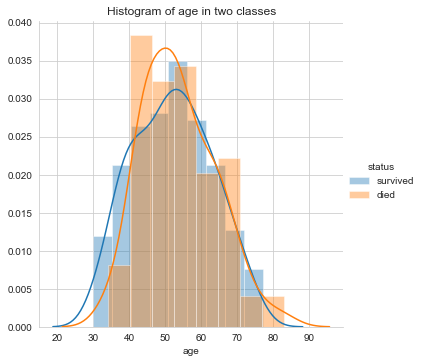

In [165]:

sns.set_style("whitegrid");
sns.FacetGrid(haber , hue = "status" , height = 5).map(sns.distplot , "age").add_legend();
plt.title('Histogram of age in two classes')

plt.show()


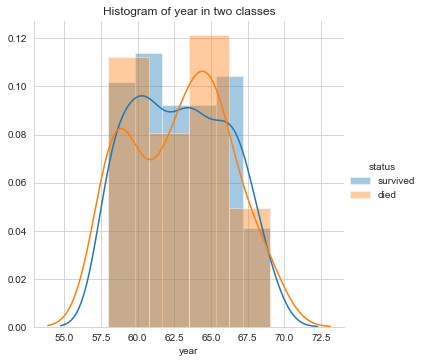

In [166]:

sns.set_style("whitegrid");
sns.FacetGrid(haber , hue = "status" , height = 5).map(sns.distplot , "year").add_legend();
plt.title('Histogram of year in two classes')

plt.show()


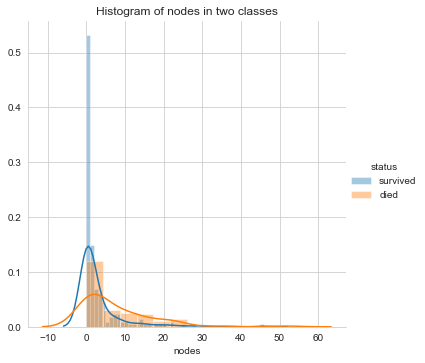

In [167]:

sns.set_style("whitegrid");
sns.FacetGrid(haber , hue = "status" , height = 5).map(sns.distplot , "nodes").add_legend();
plt.title('Histogram of nodes in two classes')

plt.show()


[0.10666667 0.         0.08       0.         0.         0.10666667
 0.         0.         0.10222222 0.         0.07111111 0.
 0.         0.09777778 0.         0.         0.10222222 0.
 0.         0.06666667 0.         0.09777778 0.         0.
 0.09333333 0.         0.         0.04444444 0.         0.03111111]
[58.         58.36666667 58.73333333 59.1        59.46666667 59.83333333
 60.2        60.56666667 60.93333333 61.3        61.66666667 62.03333333
 62.4        62.76666667 63.13333333 63.5        63.86666667 64.23333333
 64.6        64.96666667 65.33333333 65.7        66.06666667 66.43333333
 66.8        67.16666667 67.53333333 67.9        68.26666667 68.63333333
 69.        ]
[0.14814815 0.         0.11111111 0.         0.         0.04938272
 0.         0.         0.03703704 0.         0.08641975 0.
 0.         0.09876543 0.         0.         0.09876543 0.
 0.         0.16049383 0.         0.07407407 0.         0.
 0.04938272 0.         0.         0.03703704 0.         0.0493827

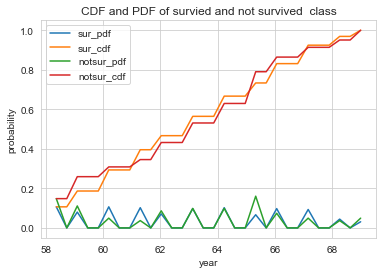

In [168]:
counts, bin_edges = np.histogram(survived['year'], bins= 30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(notsurvived['year'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','notsur_pdf', 'notsur_cdf'])
plt.title('CDF and PDF of survied and not survived  class')
plt.xlabel('year')
plt.ylabel('probability')

plt.show()

[0.02222222 0.00888889 0.02222222 0.01777778 0.02666667 0.06222222
 0.01333333 0.06222222 0.04888889 0.02666667 0.04888889 0.01777778
 0.08       0.01777778 0.06666667 0.07555556 0.02222222 0.06666667
 0.03111111 0.04444444 0.01777778 0.05333333 0.04       0.01777778
 0.02222222 0.02222222 0.01777778 0.00888889 0.00888889 0.00888889]
[30.         31.56666667 33.13333333 34.7        36.26666667 37.83333333
 39.4        40.96666667 42.53333333 44.1        45.66666667 47.23333333
 48.8        50.36666667 51.93333333 53.5        55.06666667 56.63333333
 58.2        59.76666667 61.33333333 62.9        64.46666667 66.03333333
 67.6        69.16666667 70.73333333 72.3        73.86666667 75.43333333
 77.        ]
[0.02469136 0.         0.01234568 0.01234568 0.0617284  0.04938272
 0.07407407 0.08641975 0.03703704 0.04938272 0.02469136 0.12345679
 0.07407407 0.02469136 0.03703704 0.03703704 0.03703704 0.04938272
 0.04938272 0.02469136 0.02469136 0.01234568 0.02469136 0.01234568
 0.01234568 0.   

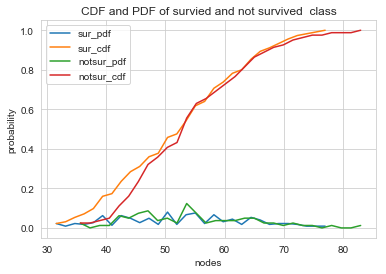

In [169]:
counts, bin_edges = np.histogram(survived['age'], bins= 30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(notsurvived['age'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','notsur_pdf', 'notsur_cdf'])
plt.title('CDF and PDF of survied and not survived  class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.show()

<b> Observation </b>


- Age cannot be the factor to decide survival status 

[0.66666667 0.12444444 0.04444444 0.02666667 0.02222222 0.03111111
 0.00888889 0.00888889 0.00444444 0.01777778 0.00444444 0.00444444
 0.00444444 0.00444444 0.00888889 0.         0.00444444 0.
 0.00444444 0.00444444 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00444444]
[ 0.          1.53333333  3.06666667  4.6         6.13333333  7.66666667
  9.2        10.73333333 12.26666667 13.8        15.33333333 16.86666667
 18.4        19.93333333 21.46666667 23.         24.53333333 26.06666667
 27.6        29.13333333 30.66666667 32.2        33.73333333 35.26666667
 36.8        38.33333333 39.86666667 41.4        42.93333333 44.46666667
 46.        ]
[0.33333333 0.14814815 0.08641975 0.03703704 0.04938272 0.0617284
 0.04938272 0.04938272 0.03703704 0.01234568 0.02469136 0.01234568
 0.02469136 0.04938272 0.         0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.         0.         0.         0.         0.   

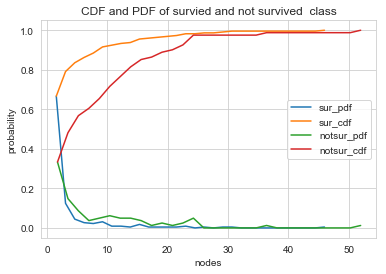

In [170]:
counts, bin_edges = np.histogram(survived['nodes'], bins= 30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


counts, bin_edges = np.histogram(notsurvived['nodes'], bins=30, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:] ,cdf)
plt.legend(['sur_pdf', 'sur_cdf','notsur_pdf', 'notsur_cdf'])
plt.title('CDF and PDF of survied and not survived  class')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.show()

# 2.0  Box & violin plot

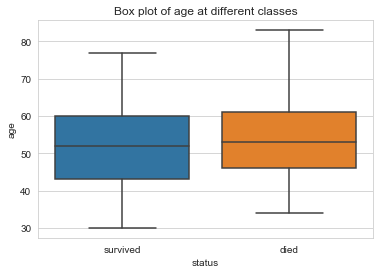

In [171]:
sns.boxplot(x='status',y='age', data= haber)
plt.title('Box plot of age at different classes')

plt.show()


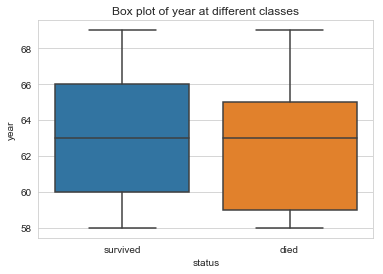

In [172]:
sns.boxplot(x='status',y='year', data= haber)
plt.title('Box plot of year at different classes')

plt.show()


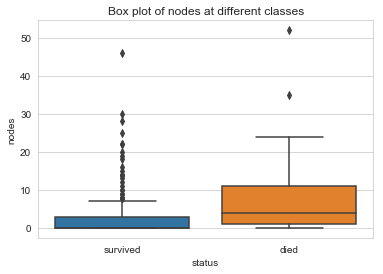

In [173]:
sns.boxplot(x='status',y='nodes', data= haber)
plt.title('Box plot of nodes at different classes')

plt.show()


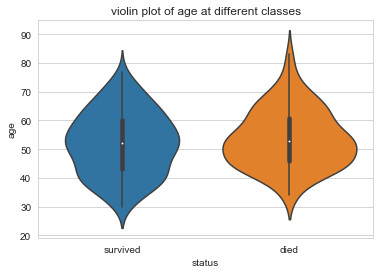

In [174]:
sns.violinplot(x="status", y="age", data = haber, size=8)
plt.title('violin plot of age at different classes')

plt.show()

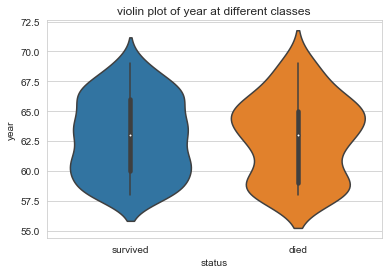

In [175]:
sns.violinplot(x="status", y="year", data = haber, size=8)
plt.title('violin plot of year at different classes')

plt.show()

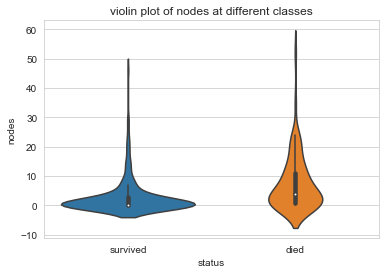

In [176]:
sns.violinplot(x="status", y="nodes", data = haber, size=8)
plt.title('violin plot of nodes at different classes')

plt.show()

# observation



* overlap of data is less only with respect to nodes 
* nodes are the important feature to check the survival status 

* since there is no big overlap between two plots , we cannot take age, year of operation into consideration as deciding factor for survival
* age can be the second important feature in deciding the survival status 

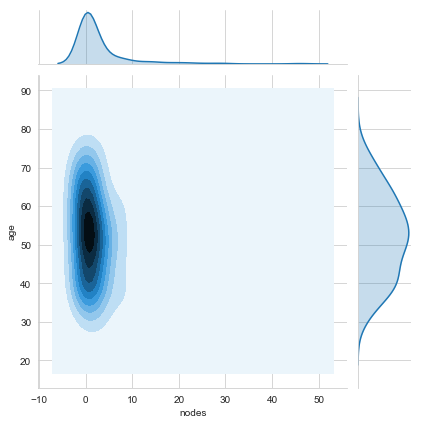

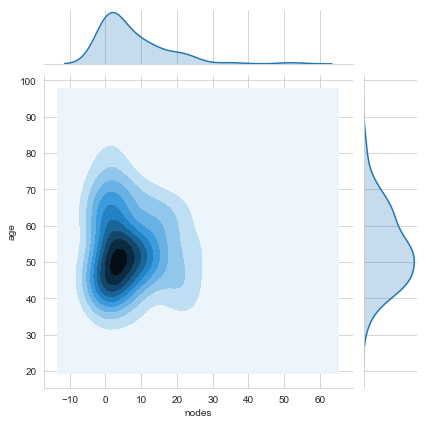

In [177]:
sns.jointplot(x="nodes", y="age", data = survived , kind="kde");
plt.show();

sns.jointplot(x="nodes", y="age", data = notsurvived , kind="kde");
plt.show();

# Conclusions:

1) Patient's age and Year  alone are not deciding factors for  survival.

2) Number of nodes increase the chance of survival of patient decrease at the same time having zero postivie axillary nodes doesn't guarentee survival as there are cases where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.

3) Predicting survival rate is very difficult with the given data as 306 data points will not be sufficient to decide 

4) out of 306 there were cases where patients with zero nodes died before 5 years

